### TensorFlowの高レベルAPIの使用方法:Dataset APIを使ってみる with Keras
https://qiita.com/cometscome_phys/items/d36af6fcead172847231

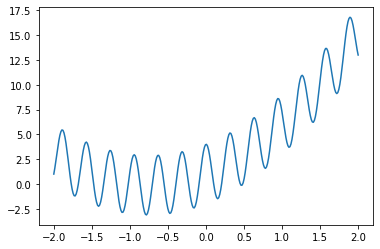

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 300
x0 = np.linspace(-2.0, 2.0, n)
a0 = 3.0
a1 = 2.0
b0 = 1.0
y0 = np.zeros(n)
y0[:] = a0*x0+a1*x0**2 + b0 + 3*np.cos(20*x0)

plt.plot(x0,y0 )
plt.show()
#plt.savefig("graph.png")

### インプットデータの生成

In [3]:
def make_phi(x0,n,k):    
    phi = np.array([x0**j for j in range(k)])
    return phi.T

In [4]:
x0 = np.linspace(-2.0, 2.0, n)
k = 4
phi = make_phi(x0,n,k)

In [5]:
n_test = 100
x0_test = np.linspace(-2.0, 2.0, n_test)
y0_test = np.zeros(n_test)
y0_test[:] = a0*x0_test+a1*x0_test**2 + b0 + 3*np.cos(20*x0_test)
phi_test = make_phi(x0_test,n_test,k)

### Dataset APIの使用

In [7]:
batch_size = 20
dataset = tf.data.Dataset.from_tensor_slices((phi, y0)).shuffle(10).batch(batch_size)
dataset = dataset.repeat()

In [10]:
test_dataset = tf.data.Dataset.from_tensor_slices((phi_test, y0_test)).batch(n_test)
test_dataset = test_dataset.repeat()

### モデル

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers

def build_model(d_input,d_middle):
    inputs = tf.keras.Input(shape=(d_input,))  #インプットの次元を指定
    x = layers.Dense(d_middle, activation='relu')(inputs) #中間層の指定
    y = layers.Dense(1)(x) #最終層の指定
    adam = optimizers.Adam() #最適化にはAdamを使用
    model =  tf.keras.Model(inputs=inputs, outputs=y) #モデルのインプットとアウトプットを指定

    model.compile(optimizer=adam,
              loss='mean_squared_error') #modelの構築。平均二乗誤差をloss関数とした。

    return model

In [12]:
d_input = k
d_middle = 10
model = build_model(d_input,d_middle)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### 学習

In [15]:
history = model.fit(dataset, 
                    epochs=10, 
                    steps_per_epoch=1,
                    validation_data=test_dataset,
                    validation_steps=1)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 4.4842 - val_loss: 8.2284
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 4.7401 - val_loss: 8.2214
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 4.6454 - val_loss: 8.2149
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 5.3825 - val_loss: 8.2091
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 9.6356 - val_loss: 8.2038
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 6.5105 - val_loss: 8.1992
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 6.6115 - val_loss: 8.1951
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 5.3483 - val_loss: 8.1917
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 4.1540 - val_loss: 8.1884
Epoch 10/10
1/1 [==============================] - 0s 36ms/step - loss: 5.6974 - val_loss: 8.1854


### 結果の確認

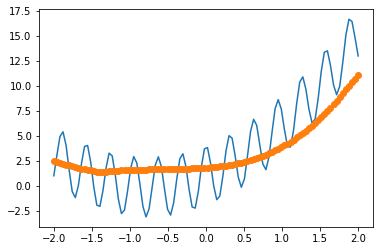

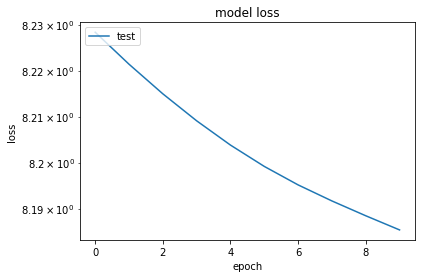

<Figure size 432x288 with 0 Axes>

In [16]:
ytest = model.predict(phi_test)

plt.plot(x0_test ,y0_test  )
plt.plot(x0_test ,ytest,'o')
plt.show()
plt.savefig("graph.png")

plt.yscale("log")
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()
plt.savefig("test.png")